### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd 'drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation/'

/content/drive/Othercomputers/My Laptop (1)/MY COLLEGE/ISI KOLKATA/PROJECTS/IIT J Summer Internship 2022/Code/Neural-Uncertainty-Representation


### Importing Necessary Libraries


In [ ]:
!pip install scprep

In [21]:
import numpy as np
import pandas as pd
import scprep as scp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Loading the Data
We import the data of a young subject's 3D-Tensor Data of dimensions (TR, Voxel, Number of Subjects) for the 5 different ROIs as follows:
- lOFC
- mOFC
- mPFC
- dmPFC
- vlPFCn

In [4]:
data_lOFC = np.load('YOUNG/data_lOFC.npy')
data_mOFC = np.load('YOUNG/data_mOFC.npy')
data_mPFC = np.load('YOUNG/data_mPFC.npy')
data_dmPFC = np.load('YOUNG/data_dmPFC.npy')
data_vlPFC = np.load('YOUNG/data_vlPFC.npy')

We now find the BOLD data for all voxel and all the TRs averaged over the subjects.

In [5]:
data_lOFC_avg = np.mean(data_lOFC, axis=2)
data_mOFC_avg = np.mean(data_mOFC, axis=2)
data_mPFC_avg = np.mean(data_mPFC, axis=2)
data_dmPFC_avg = np.mean(data_dmPFC, axis=2)
data_vlPFC_avg = np.mean(data_vlPFC, axis=2)

### PCA Representation

In [28]:
def plot_pca_rep(data, n_comps, c, ax=None, title="", legend_title=""):
  # We find the PCA embedding for the data
  pca = PCA(n_components=n_comps, random_state=43)
  principalComponents = pca.fit_transform(data)
  
  # Plot PCA data
  scp.plot.scatter2d(principalComponents, ax=ax,  c = c, label_prefix='PCA ', title=title, legend_title=legend_title)

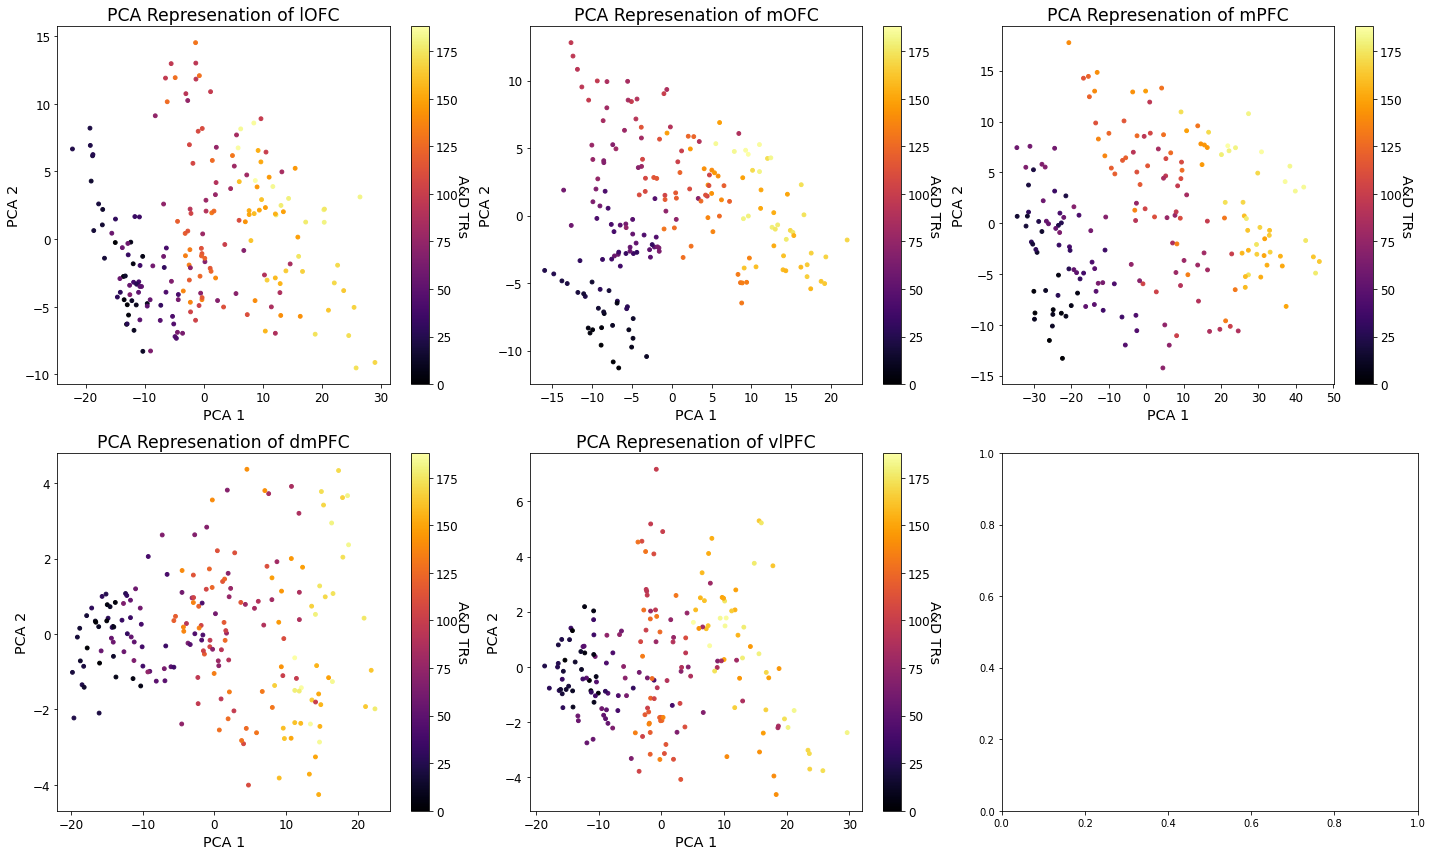

In [48]:
fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_pca_rep(data, 3, list(range(data.shape[0])), ax[min(max(0, i-2),1),i%3], "PCA Represenation of "+ name, "A&D TRs")
  i += 1
  fig.tight_layout()

I have color coded each set of Ascent and Descent below, i.e.
- 0 indicates those TRs which are neither ascent and descent. 
- 1 indicates those TRs which are in A1 and D1.
- 2 indicates those TRs which are in A2 and D2.
- 3 indicates those TRs which are in A3 and D3.
- 4 indicates those TRs which are in A4 and A4
- 5 indicates those TRs wiich are in A5 and D5.

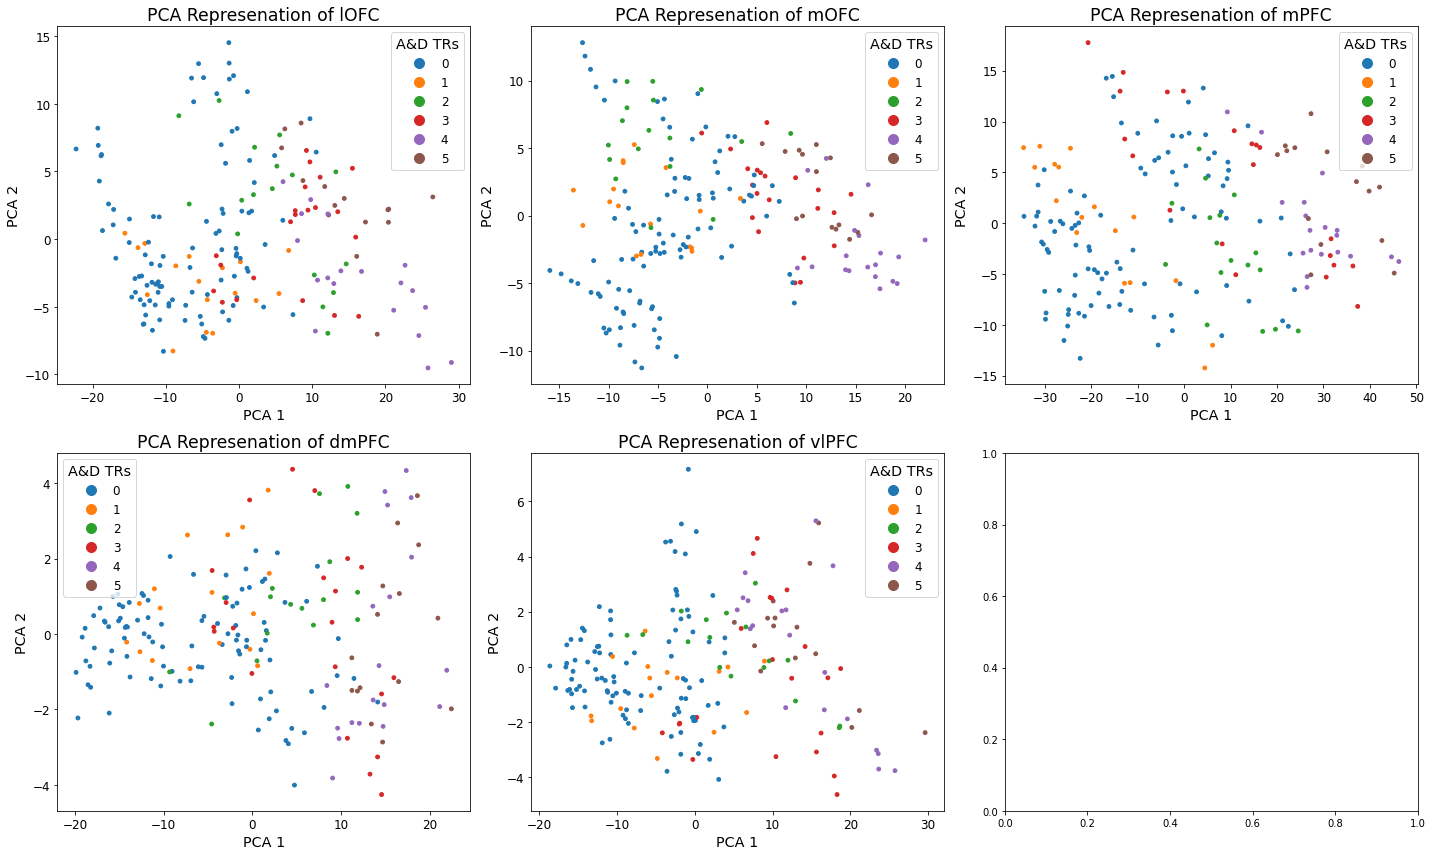

In [33]:
ROIs_data = [data_lOFC_avg, data_mOFC_avg, data_mPFC_avg, data_dmPFC_avg, data_vlPFC_avg]
ROIs = ["lOFC", "mOFC", "mPFC", "dmPFC", "vlPFC"]

fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_pca_rep(data, 6, [0]*56+[1]*17+[2]*17+[0]*44+[3]*21+[4]*19+[5]*15, ax[min(max(0, i-2),1),i%3], "PCA Represenation of "+ name, "A&D TRs")
  i += 1
  fig.tight_layout()

I have color coded each set of Ascent and Descent below, i.e.
- 0 indicates those TRs which are neither ascent and descent. 
- 1 indicates those TRs which are in Ascents.
- 2 indicates those TRs which are in Descents.

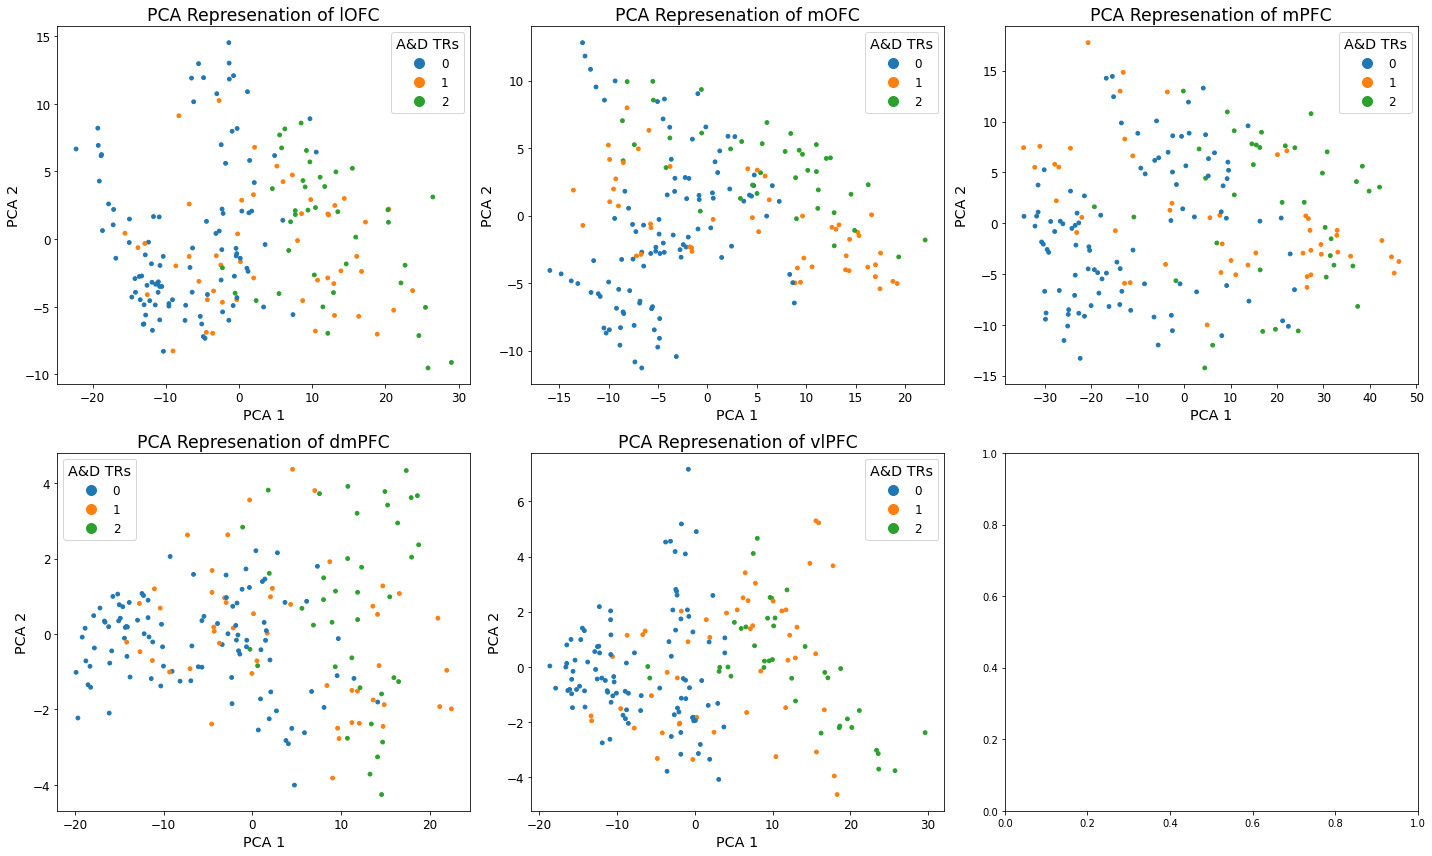

In [30]:
fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_pca_rep(data, 3, [0]*56+[1]*12+[2]*5+[1]*9+[2]*8+[0]*44+[1]*9+[2]*12+[1]*13+[2]*6+[1]*7+[2]*8, ax[min(max(0, i-2),1),i%3], "PCA Represenation of "+ name, "A&D TRs")
  i += 1
  fig.tight_layout()

### tSNE Representation

In [39]:
def plot_tsne_rep(data, n_comps, c, method="barnes_hut", ax=None, title="", legend_title=""):
  # We find the tSNE embedding for the data
  tsne = TSNE(n_components=n_comps, learning_rate="auto", random_state=43, init="random", method=method)
  tsne_embd = tsne.fit_transform(data)
  
  # Plot tSNE data
  scp.plot.scatter2d(tsne_embd, ax=ax,  c = c, label_prefix='t-SNE ', title=title, legend_title=legend_title)

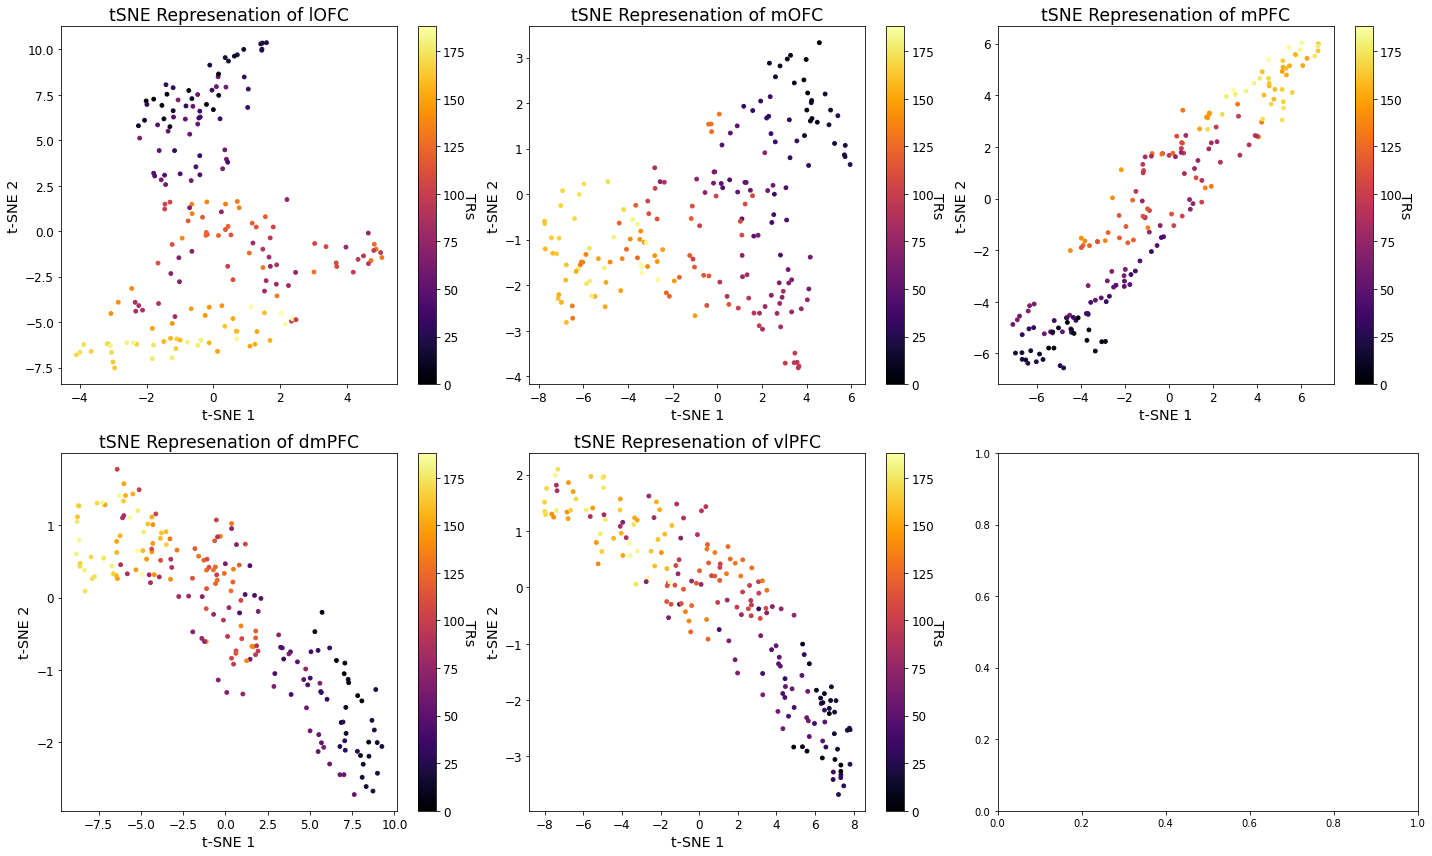

In [46]:
fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_tsne_rep(data, 3, list(range(data.shape[0])), "barnes_hut", ax[min(max(0, i-2),1),i%3], "tSNE Represenation of "+ name, "TRs")
  i += 1
  fig.tight_layout()

tSNE with 3 components was applied and "barnes_hut" method.\
I have color coded each set of Ascent and Descent below, i.e.
- 0 indicates those TRs which are neither ascent and descent. 
- 1 indicates those TRs which are in A1 and D1.
- 2 indicates those TRs which are in A2 and D2.
- 3 indicates those TRs which are in A3 and D3.
- 4 indicates those TRs which are in A4 and A4
- 5 indicates those TRs wiich are in A5 and D5.

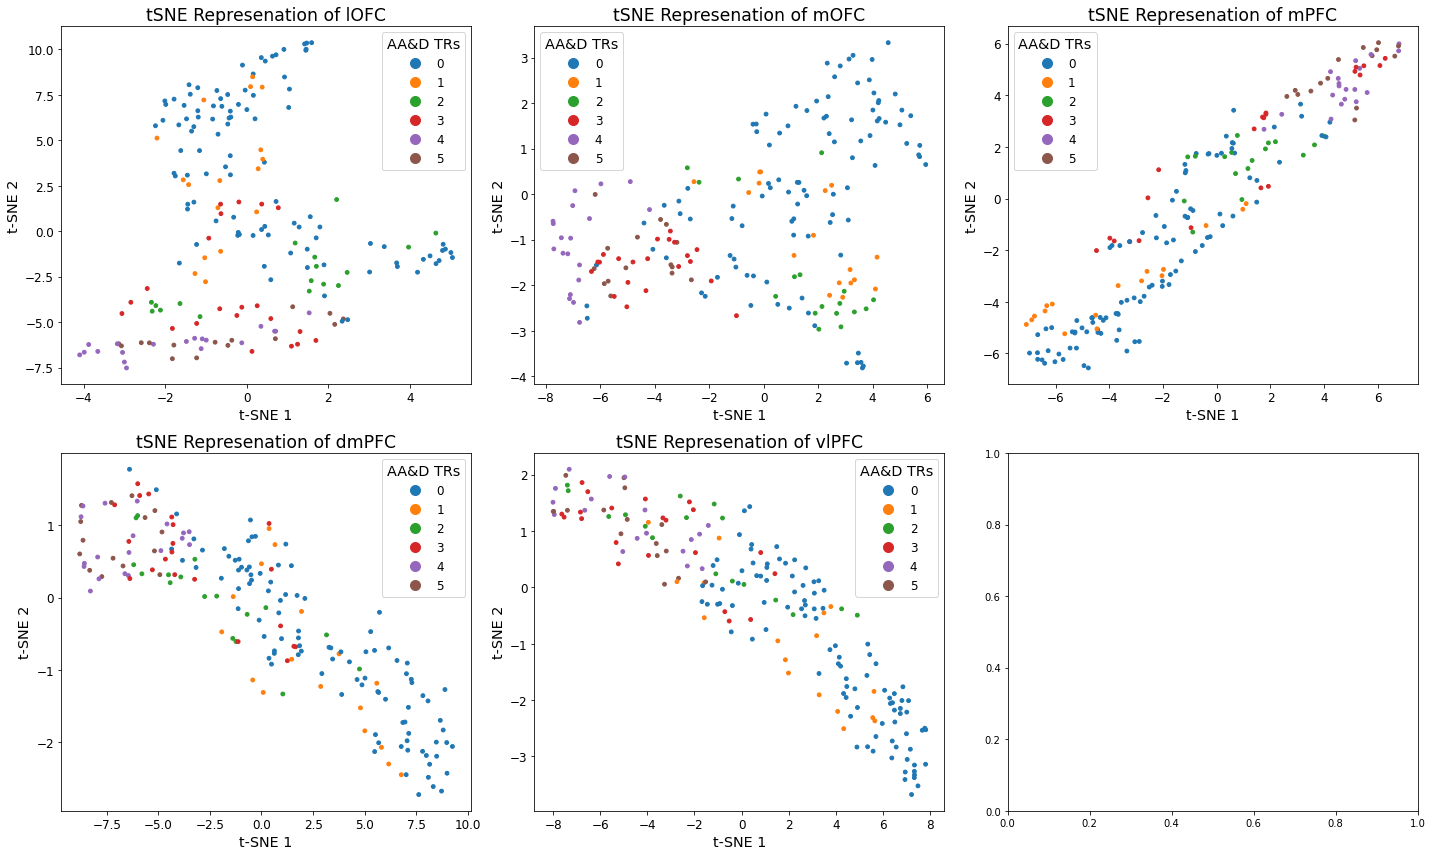

In [44]:
fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_tsne_rep(data, 3, [0]*56+[1]*17+[2]*17+[0]*44+[3]*21+[4]*19+[5]*15, "barnes_hut", ax[min(max(0, i-2),1),i%3], "tSNE Represenation of "+ name, "A&D TRs")
  i += 1
  fig.tight_layout()

tSNE with 3 components was applied with "barnes_hut"(default) method.\
I have color coded each set of Ascent and Descent below, i.e.
- 0 indicates those TRs which are neither ascent and descent. 
- 1 indicates those TRs which are in Ascents.
- 2 indicates those TRs which are in Descents.

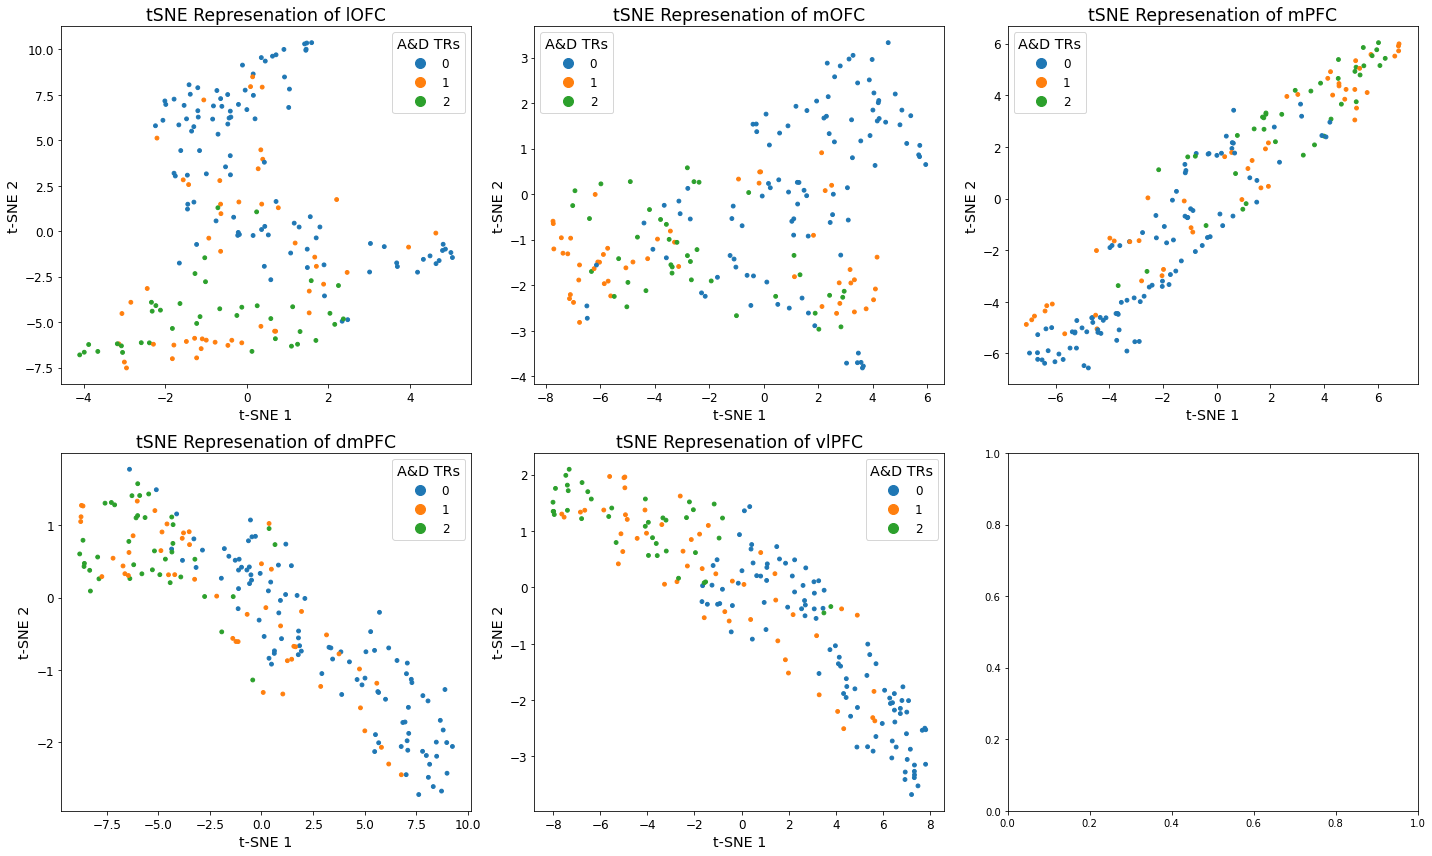

In [47]:
fig, ax = plt.subplots(2,3, figsize=(20,12))
i = 0
for name, data in zip(ROIs, ROIs_data):
  plot_tsne_rep(data, 3, [0]*56+[1]*12+[2]*5+[1]*9+[2]*8+[0]*44+[1]*9+[2]*12+[1]*13+[2]*6+[1]*7+[2]*8, "barnes_hut", ax[min(max(0, i-2),1),i%3], "tSNE Represenation of "+ name, "A&D TRs")
  i += 1
  fig.tight_layout()